In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,LSTM
from tensorflow.keras.layers import MaxPooling1D, GlobalMaxPooling1D, Conv1D, Embedding
from sklearn.model_selection import train_test_split

In [57]:
df=pd.read_excel("Cricket.xlsx")
df.sample(10, random_state=1)

,Source,Date,Text,Category,Polarity
0,BBC Bangla,2018-06-03 00:00:00,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,other,positive
1,BBC Bangla,2018-06-04 00:00:00,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,team,positive
2,BBC Bangla,15/6/2017,বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?,team,positive
3,BBC Bangla,15/6/2020,সৌম্যকে বাদ দেওয়া হোক,batting,negative
4,BBC Bangla,27/1/2018,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",team,positive
...,...,...,...,...,...
2974,Prothom Alo,2018-11-02 00:00:00,নির্বাচকমণ্ডলী দের গালে জুতা মারা উচিত.. হালা...,team management,negative
2975,Prothom Alo,2018-11-02 00:00:00,"বস ভাল করবে ইটাই আশা করি,দারুন এরজন ব্যাটিং অল...",batting,negative
2976,Prothom Alo,2018-11-02 00:00:00,"বস ভাল করবে ইটাই আশা করি,দারুন এরজন ব্যাটিং অল...",bowling,negative
2977,Prothom Alo,2018-11-02 00:00:00,গুগল সার্চ করে মিনহাজের রানরেট দেখে নিন? এভারে...,team management,negative


In [58]:
df.columns

Index(['Source', 'Date', 'Text', 'Category', 'Polarity'], dtype='object')

# cleaning data

In [59]:
import re
en_regex = r"[!|\"|#|$|%|&|\\|'|(|)|*|+|,|.|/|:|;|<|=|>|?|@|[|\|\|\]|^|_|`|{|\||}|~|^a-zA-Z0-9]"
bn_regex = r"[।|০।১।২।৩।৪।৫।৬।৭।৮।৯।,।:।'|‘|’]"

def text_clean(text):
    text = re.sub(en_regex, r"", text.lower())
    text = re.sub(bn_regex, r"", text)
    return " ".join(text.split(" "))


df['Text'] = df['Text'].apply(text_clean)

In [60]:
df.sample(10, random_state=1)
df

,Source,Date,Text,Category,Polarity
0,BBC Bangla,2018-06-03 00:00:00,জয় বাংলা কাপ তাও আবার স্বাধীনতার মাস মার্চে যা...,other,positive
1,BBC Bangla,2018-06-04 00:00:00,জয় বাংলা কাপ তাও আবার স্বাধীনতার মাস মার্চে যা...,team,positive
2,BBC Bangla,15/6/2017,বাংলাদেশের পরে ভারতের সাপর্ট ই করি,team,positive
3,BBC Bangla,15/6/2020,সৌম্যকে বাদ দেওয়া হোক,batting,negative
4,BBC Bangla,27/1/2018,প্রথমটি হচ্ছে কোচ অতপর সাকিবসাকিব আর সাকিবরে দ...,team,positive
...,...,...,...,...,...
2974,Prothom Alo,2018-11-02 00:00:00,নির্বাচকমণ্ডলী দের গালে জুতা মারা উচিত হালার ...,team management,negative
2975,Prothom Alo,2018-11-02 00:00:00,বস ভাল করবে ইটাই আশা করিদারুন এরজন ব্যাটিং অলর...,batting,negative
2976,Prothom Alo,2018-11-02 00:00:00,বস ভাল করবে ইটাই আশা করিদারুন এরজন ব্যাটিং অলর...,bowling,negative
2977,Prothom Alo,2018-11-02 00:00:00,গুগল সার্চ করে মিনহাজের রানরেট দেখে নিন এভারেজ...,team management,negative


In [61]:
df['Polarity'].value_counts()

negative    2152
positive     566
neutral      261
Name: Polarity, dtype: int64

# Labeling

In [62]:
df['Polarity'] = df['Polarity'].map({'positive':1, 'negative':0,'neutral':2})

In [63]:
df.sample(10, random_state=1)

,Source,Date,Text,Category,Polarity
445,Prothom Alo,2018-07-02 00:00:00,হাতরুর সিংহ একটি বেয়াদব মানুষ,other,0
2687,Prothom Alo,2018-10-02 00:00:00,রংগনা হেরাত একাই শেষ করে ফেলবে স্পিন করলে পারল...,bowling,0
1541,Prothom Alo,2018-02-08 00:00:00,সাকিব বিহীন দলটা সত্যিই অনেক অগোচালো,team,0
521,Prothom Alo,2018-05-02 00:00:00,রানের ব্যবধানে চিরপ্রতিদ্বন্দ্বী ভারতের বিপক্...,batting,0
367,Prothom Alo,2018-07-02 00:00:00,রাজ্জাকের জায়গাটা রাজ্জাককে দেওয়া হোক,team management,2
713,Prothom Alo,2018-08-02 00:00:00,রাজ্জাক নিজের জন্য নয়দেশের জন্য প্রাণ উজাড় করে...,bowling,1
2185,Prothom Alo,2018-10-02 00:00:00,মন অদ্ভুত উদাহরণ দিয়া আমাদের বুজানোর চেষ্টা কর...,other,0
1156,Prothom Alo,2018-09-02 00:00:00,আমরা নাকি হাতুড়ের শ্রীলংকাকে পাত্তাই দিচ্ছি না...,team,0
282,Prothom Alo,19/1/2018,হাথুরুর হার্ট ভেঙ্গে খান খান,other,0
558,Prothom Alo,2018-04-02 00:00:00,বাংলার ভিভিএস লক্ষ্মণ,team,1


In [64]:
df['Text'].values

array(['জয় বাংলা কাপ তাও আবার স্বাধীনতার মাস মার্চে যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট',
       'জয় বাংলা কাপ তাও আবার স্বাধীনতার মাস মার্চে যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট',
       'বাংলাদেশের পরে ভারতের সাপর্ট ই করি ', ...,
       'বস ভাল করবে ইটাই আশা করিদারুন এরজন ব্যাটিং অলরাউন্ডার',
       'গুগল সার্চ করে মিনহাজের রানরেট দেখে নিন এভারেজ  রানরেট নিয়ে এমন একজন ব্যক্তি কি করে প্রধান নির্বাচক হয়',
       'টিম মেনেজমেন্ট থেকে শুরু করে সবাইকে গাজার পরিবর্তে অাফিম দেওয়া প্রয়োজন যাতে নেশা হলে ও মস্তিষ্ক টা নিয়ন্ত্রণে থাকেফালতু সব গাজাখুড়ি বাহানা'],
      dtype=object)

# Plot Frequency of sentiment categoru

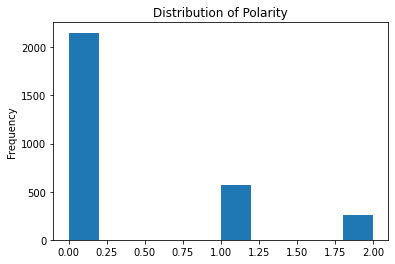

In [65]:

df['Polarity'].plot(kind='hist', title='Distribution of Polarity')

In [66]:
from keras import utils as np_utils
x=df['Text'].values
y=df['Polarity'].values


Using TensorFlow backend.


# tokenize and pad_sequence

In [68]:
max_features = 2000
max_text_length = 400
embedding_dims =100

x_tokenizer = text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

# Building model

In [69]:

model = Sequential([
    Embedding(max_features,  embedding_dims, input_length=max_text_length),

    Conv1D(250,3,padding='valid',activation='relu'),
    Dropout(0.2),
    MaxPooling1D(),
    GlobalMaxPooling1D(),

    Dense(250, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')   
])

# Model Summary

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 100)          200000    
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          75250     
_________________________________________________________________
dropout (Dropout)            (None, 398, 250)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 250)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0

# Model compile

In [71]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split data training and testing

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x_train_val,y,test_size=.2,random_state=42)

# Model train

In [73]:
history=model.fit(x_train,y_train, validation_data=(x_test, y_test),
                  epochs=3,batch_size=32,verbose=1)

Train on 2383 samples, validate on 596 samples
Epoch 1/3
2383/2383 [==============================] - 237s 100ms/sample - loss: 0.7612 - accuracy: 0.7130 - val_loss: 0.7035 - val_accuracy: 0.7265
Epoch 2/3
2383/2383 [==============================] - 202s 85ms/sample - loss: 0.6137 - accuracy: 0.7587 - val_loss: 0.6537 - val_accuracy: 0.7584
Epoch 3/3
2383/2383 [==============================] - 438s 184ms/sample - loss: 0.4796 - accuracy: 0.8221 - val_loss: 0.6659 - val_accuracy: 0.7500


#  plot the epoch vs accuracy graph


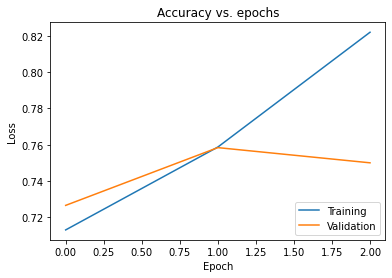

In [74]:

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

# plot the epoch vs loss graph

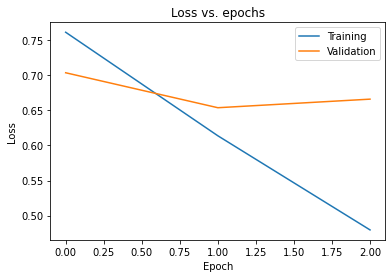

In [75]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 